In [12]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob

In [13]:
source='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'

In [23]:
#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/'
sourceData1=sourceData+'eraint/'
sourceData2=sourceData+'era5/'
sourceData3=sourceData+'jra55/'
sourceData4=sourceData+'ncep-ncar/'

In [16]:
domain='MA'
season='DJFMA'
iyr=1982
fyr=2014

In [17]:
variable='z500'
domain='MA'
season='DJFMA'

In [19]:
model1='eraint'
filename1 = 'Z500_mon.eraint_197901_201908.nc'
ds1 = xr.open_dataset(sourceData1+filename1)['z']
print(ds1.units)
ds1=ds1[:,0,:,:]/9.8
field1=dom.field_dom(ds1,domain)

m**2 s**-2
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [10]:
#latlim=slice(60,10)
#lonlim=slice(40,130)
1

In [20]:
model2=str('era5')
filename2 = 'Z500_mon.era5_195001_202105_interp.nc'
ds2 = xr.open_dataset(sourceData2+filename2)['z']
ds2=ds2[:,0,:,:]/9.8
field2=dom.field_dom(ds2,domain)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [24]:
model3=str('jra55')
filename3 = 'Z500_mon.jra55_195801_202105.nc'
ds3 = xr.open_dataset(sourceData3+filename3)['gh']
ds3=ds3[:,0,:,:]
print(ds3)
field3=dom.field_dom(ds3,domain)

<xarray.DataArray 'gh' (time: 761, lat: 73, lon: 144)>
[7999632 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
    lev      float64 5e+04
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-05-01
Attributes:
    long_name:  Geopotential Height
    units:      gpm
    code:       7
    table:      200
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [26]:
model4=str('ncep-ncar')
filename4 = 'Z500_mon.ncep-ncar_194801_202105.nc'
ds4 = xr.open_dataset(sourceData+filename4)['hgt']
ds4=ds4[:,0,:,:]
field4=dom.field_dom(ds4,domain)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [27]:
iyr=1982
fyr=2014
valsList=[]
anomsList=[]


dsList=[field1,field2,field3,field4]
modelList=[model1,model2,model3,model4]

for elem in dsList:
    
    v,a=climb.seasonal_selection(elem,season,6,iyr,6,fyr)
    valsList.append(v)
    anomsList.append(a)


32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014


In [28]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
nyrList=[]
#---------------------------------------------------------
for elem in anomsList:
    #par=climb.spatial_regression(elem,index)
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    nyrList.append(len(elem.time))
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])
df=fyr-iyr

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


In [22]:
#LabelListX=[model1,model2,model3,model4]
#LabelListY=[str(iyr1)+'-'+str(fyr1),'','',str(iyr2)+'-'+str(fyr2),'','',str(iyr3)+'-'+str(fyr3),'','']

In [29]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_z500_eraint_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_z500_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_z500_jra55_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_z500_ncep-ncar_obs_original_MA_DJFMA_1982_2014


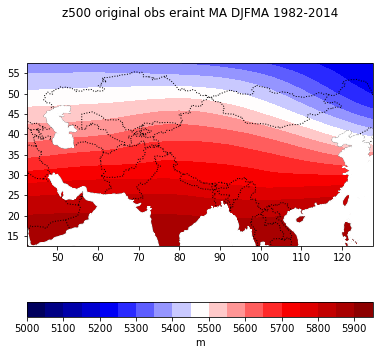

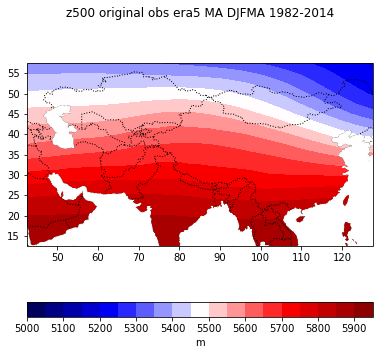

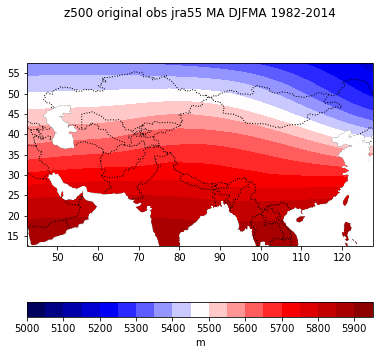

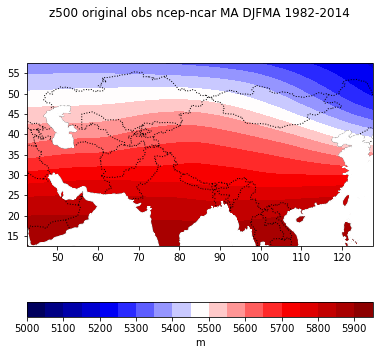

In [36]:
##Clim-----------------
clevs=np.arange(5000,6000,50)
color='seismic'
subdomain='MA'
units='m'
exp='obs'
decomp='original'
for i in range(len(climList)):
    lat,lon=climb.latlon(climList[i])
    figclim=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=climList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figclim.savefig(plotsDir+ofileC+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileC)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_z500_eraint_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_z500_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_z500_jra55_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_z500_ncep-ncar_obs_original_MA_DJFMA_1982_2014


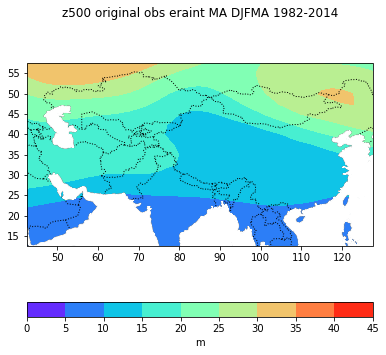

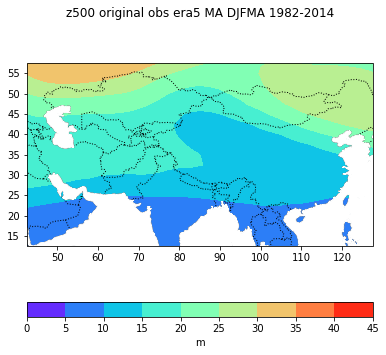

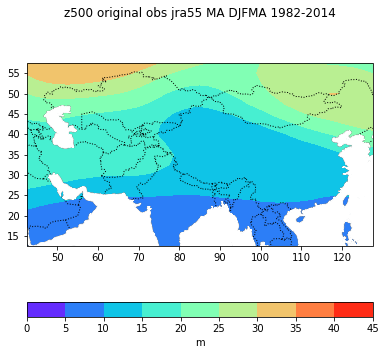

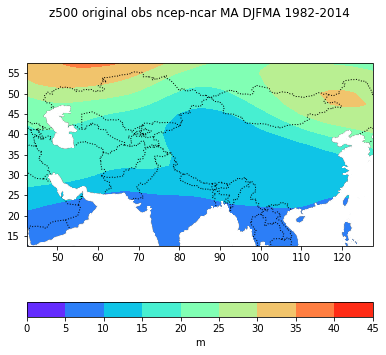

In [40]:
##STD-----------------
clevs=np.arange(0,50,5)
color='rainbow'
subdomain='MA'
exp='obs'
decomp='original'
for i in range(len(stdList)):
    lat,lon=climb.latlon(stdList[i])
    figstd=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=stdList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileS='anoms_std_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figstd.savefig(plotsDir+ofileS+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileS)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_z500_eraint_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_z500_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_z500_jra55_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_z500_ncep-ncar_obs_original_MA_DJFMA_1982_2014


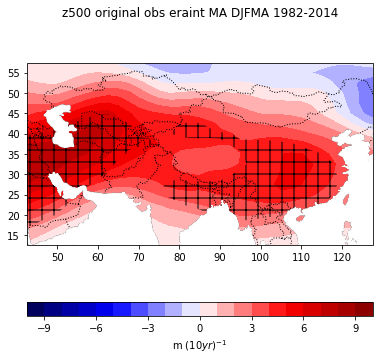

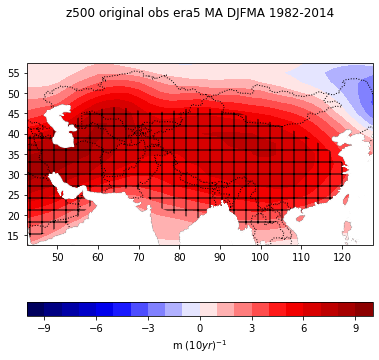

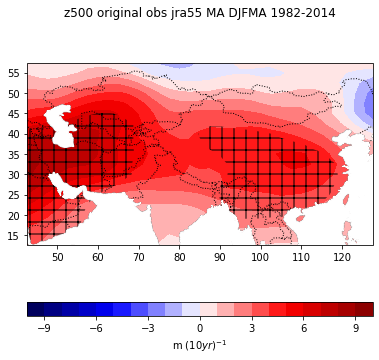

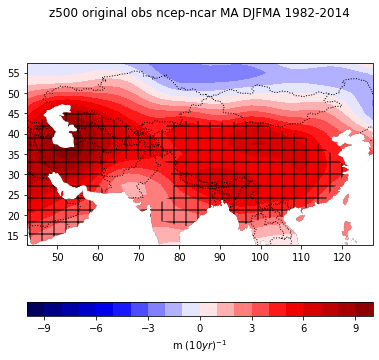

In [42]:
clevs=np.arange(-10,11,1)
#color='RdBu_r'
subdomain='MA'
exp='obs'
decomp='original'
for i in range(len(parList)):
    lat,lon=climb.latlon(trendList[i])
    figtrend=myplot.oneplot_trend(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, units=units, subdomain=subdomain, par=parList[i], xlon=parList[i][0][lon], ylat=parList[i][0][lat], season=season, iyr=iyr, fyr=fyr)
 #   figtrend=myplot.oneplot_trend(oneplot_trend(variable,decomp,exp,modelList[i],clevs,units,subdomain,parList[i],xlon,ylat,season,iyr,fyr))
    ofileT='spatialtrend_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figtrend.savefig(plotsDir+ofileT+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileT)